In [1]:
#!/usr/bin/env python

'''
DESCRIPTION
-----------
    To export pathway order
    
RETURN
------
    {}. :  file
        
        
EXPORTED FILE(s) LOCATION
-------------------------
    .//{}/{EXPERIMENT}/{}.
'''

# importing default libraries
# import os, argparse, sys
# sys.path.append('./')
import os, sys
ROOT_DIR = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))
os.chdir(ROOT_DIR)
sys.path.append(ROOT_DIR)

In [2]:
# importing scripts in scripts folder
from scripts import config as src
# importing default libraries
import numpy as np
import pandas as pd
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder

rand_state = 91

time_start = dt.datetime.now().time().strftime('%H:%M:%S') # = time.time() dt.datetime.now().strftime('%Y%m%d_%I%M%S%p')

**** scripts/config.py IMPORTED!!!
**** PROJECT FOLDER ,  /home/pgundogdu/projects/signalization_prior_knowledge_based_nn


In [3]:
# # giving the model path
# model_path = '../data/output/result_NN/models/signaling_log1p/design_a1_signaling.h5'

dataset              = 'Fig3g_sw_log1p.pck'
bio_knowledge        = 'pbk_layer_hsa.txt'
experiment           = 'exper_immune'
analysis             = 'activation'
# defining biological knowledge layer based on the architecture of required model
bio_layer_number     = 1

# the output location
loc_output = os.path.join(src.DIR_REPORTS, analysis, experiment)
src.define_folder(loc_=loc_output)

FOLDER information,  /home/pgundogdu/projects/signalization_prior_knowledge_based_nn/reports/activation/exper_immune/


'/home/pgundogdu/projects/signalization_prior_knowledge_based_nn/reports/activation/exper_immune/'

In [4]:
print('FILE FORMAT, ', dataset.split('.')[1])

if dataset.split('.')[1]=='pck':
    df_raw = pd.read_pickle(os.path.join(src.DIR_DATA_PROCESSED, experiment, dataset))
    df_raw = pd.concat([(df_raw.iloc[:, :-1]).astype(float) ,df_raw.iloc[:, -1]], axis=1)
else:
    df_raw = pd.read_csv(os.path.join(src.DIR_DATA_PROCESSED, experiment, dataset))

df_raw = df_raw[df_raw['cell_type']!='mixed'].reset_index(drop=True)
    
sort_genes = sorted(df_raw.columns[:-1])
sort_genes.extend(df_raw.columns[-1:])
df_raw = df_raw[sort_genes]

# Importing all prior biological knowledge and combine all genes to create a common gene list
list_gene = None
if (bio_knowledge!=None):
    df_bio = pd.DataFrame(pd.read_csv(os.path.join(src.DIR_DATA_PROCESSED, bio_knowledge), index_col=0)).sort_index()
    df_bio_filtered = df_bio.iloc[df_bio.index.isin(df_raw.columns), :]
    

print('Dataset cell type, ', df_raw.groupby('cell_type').size())
print('\nDataset shape             , ', df_raw.shape)
print('Biological knowledge shape, ', df_bio_filtered.shape)

print('\nDataset gene order top 10              ,', list(df_raw.columns[:10]))
print('Biological knowledge gene order top 10, ', list(df_bio_filtered.index[:10].values))

FILE FORMAT,  pck
Dataset cell type,  cell_type
B cell        1259
DC            1255
ILC            127
Macrophage    1197
Mast           130
Monocyte       865
NK            1204
Plasma B       318
T cell        3348
dtype: int64

Dataset shape             ,  (9703, 2801)
Biological knowledge shape,  (2800, 93)

Dataset gene order top 10              , ['a2m', 'abcb11', 'abcb4', 'abcc2', 'abcc8', 'abhd5', 'abi2', 'abl1', 'abl2', 'ablim1']
Biological knowledge gene order top 10,  ['a2m', 'abcb11', 'abcb4', 'abcc2', 'abcc8', 'abhd5', 'abi2', 'abl1', 'abl2', 'ablim1']


In [5]:
ohe = OneHotEncoder()
X = df_raw.iloc[:, :-1].values
y = df_raw.iloc[:, -1:].values
y_ohe = ohe.fit_transform(y).toarray()
# groups = y.reshape(1,-1)[0]

print(X.shape)
print(y.shape)
# print(groups.shape)

(9703, 2800)
(9703, 1)


In [8]:
i_design ='a1'
model, model_pbk = src.loading_model('./models/NN/exper_immune/model_'+i_design+'_'+dataset.split('.')[0]+'_train_test_split_trained.h5', bio_layer_number)
model_pbk.summary()

Loaded model!! ./models/NN/exper_immune/model_a1_Fig3g_sw_log1p_train_test_split_trained.h5
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1_input (InputLayer)    [(None, 2800)]            0         
_________________________________________________________________
layer1 (Dense)               (None, 93)                260493    
Total params: 260,493
Trainable params: 260,493
Non-trainable params: 0
_________________________________________________________________


In [9]:
y_pred = model_pbk.predict(X)
# creating dataframe which stores both prediction label of model and 'encode' information of given layer
df_activation_pred = pd.concat([pd.DataFrame(y_pred, columns=df_bio_filtered.columns)
                                , pd.DataFrame([ohe.categories_[0][i] for i in np.argmax(model.predict(X), axis=-1)],  columns=['cell_type']) ]
                              , axis=1)
df_activation_pred

,hsa03320,hsa04010,hsa04012,hsa04014,hsa04015,hsa04020,hsa04022,hsa04024,hsa04062,hsa04064,...,hsa04960,hsa04961,hsa04962,hsa04970,hsa04971,hsa04972,hsa04973,hsa04976,hsa05100,cell_type
0,0.0,13.395594,0.0,0.0,0.0,0.0,0.0,10.154698,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,NK
1,0.0,12.126397,0.0,0.0,0.0,0.0,0.0,12.807034,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,NK
2,0.0,22.910389,0.0,0.0,0.0,0.0,0.0,11.158377,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,T cell
3,0.0,19.564114,0.0,0.0,0.0,0.0,0.0,11.089033,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,T cell
4,0.0,17.193579,0.0,0.0,0.0,0.0,0.0,10.467719,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.603109,T cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9698,0.0,6.017734,0.0,0.0,0.0,0.0,0.0,0.000000,11.484808,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.895615,14.783200,ILC
9699,0.0,4.843040,0.0,0.0,0.0,0.0,0.0,0.000000,15.733421,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.402584,21.750654,ILC
9700,0.0,9.706253,0.0,0.0,0.0,0.0,0.0,0.000000,12.126993,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.916279,15.130532,ILC
9701,0.0,10.751884,0.0,0.0,0.0,0.0,0.0,0.000000,12.423340,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.184718,22.297935,ILC


## REMOVING NON-ACTIVE NODES

In [10]:
# finding non-active pathways (according to std values)
pathway_std_less_than_one = df_activation_pred.groupby('cell_type').std().sum()[df_activation_pred.groupby('cell_type').std().sum()<1].index
# printing information about non-active nodes
print('The number of non-active nodes is ', len(pathway_std_less_than_one))
print('The non-active nodes are; ')
print(pathway_std_less_than_one)

The number of non-active nodes is  68
The non-active nodes are; 
Index(['hsa03320', 'hsa04014', 'hsa04015', 'hsa04020', 'hsa04022', 'hsa04064',
       'hsa04066', 'hsa04068', 'hsa04072', 'hsa04110', 'hsa04115', 'hsa04150',
       'hsa04211', 'hsa04213', 'hsa04218', 'hsa04261', 'hsa04270', 'hsa04310',
       'hsa04340', 'hsa04360', 'hsa04370', 'hsa04390', 'hsa04510', 'hsa04520',
       'hsa04530', 'hsa04550', 'hsa04610', 'hsa04611', 'hsa04612', 'hsa04620',
       'hsa04622', 'hsa04623', 'hsa04630', 'hsa04650', 'hsa04662', 'hsa04664',
       'hsa04666', 'hsa04670', 'hsa04710', 'hsa04713', 'hsa04722', 'hsa04723',
       'hsa04724', 'hsa04727', 'hsa04728', 'hsa04740', 'hsa04742', 'hsa04750',
       'hsa04910', 'hsa04911', 'hsa04912', 'hsa04913', 'hsa04914', 'hsa04915',
       'hsa04916', 'hsa04917', 'hsa04918', 'hsa04921', 'hsa04922', 'hsa04924',
       'hsa04925', 'hsa04960', 'hsa04961', 'hsa04962', 'hsa04970', 'hsa04971',
       'hsa04972', 'hsa04973'],
      dtype='object')


## EXPORTING ACTIVE NODES' ACTIVATION SCORE

In [11]:
# export activation scores of each pathways for each sample
df_active = df_activation_pred.iloc[:, ~df_activation_pred.columns.isin(pathway_std_less_than_one)]
df_active.to_csv(os.path.join(loc_output, 'activation_score.csv'), index=False)
df_active

,hsa04010,hsa04012,hsa04024,hsa04062,hsa04071,hsa04114,hsa04151,hsa04152,hsa04210,hsa04330,...,hsa04720,hsa04725,hsa04726,hsa04810,hsa04919,hsa04920,hsa04923,hsa04976,hsa05100,cell_type
0,13.395594,0.0,10.154698,0.000000,0.000000,0.000000,4.002625,0.0,16.999960,1.338838,...,0.000000,0.0,7.730487,0.0,20.441830,19.522459,6.428140,0.000000,0.000000,NK
1,12.126397,0.0,12.807034,0.000000,0.000000,0.000000,7.020504,0.0,18.297913,0.000000,...,0.000000,0.0,8.755651,0.0,22.398369,20.165907,3.083393,0.000000,0.000000,NK
2,22.910389,0.0,11.158377,0.000000,0.000000,10.849910,3.793581,0.0,25.536024,12.576921,...,20.884975,0.0,0.000000,0.0,27.217960,13.043490,0.000000,0.000000,0.000000,T cell
3,19.564114,0.0,11.089033,0.000000,0.718987,10.317011,1.944725,0.0,23.049883,9.372149,...,13.364213,0.0,0.000000,0.0,22.537766,14.303344,0.000000,0.000000,0.000000,T cell
4,17.193579,0.0,10.467719,0.000000,0.000000,6.109198,2.754712,0.0,16.197081,4.974018,...,4.595629,0.0,3.022933,0.0,19.997471,12.933312,0.000000,0.000000,1.603109,T cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9698,6.017734,0.0,0.000000,11.484808,1.434152,2.907104,0.000000,0.0,0.000000,3.986455,...,0.000000,0.0,6.727798,0.0,0.000000,9.749834,17.101276,9.895615,14.783200,ILC
9699,4.843040,0.0,0.000000,15.733421,0.949938,4.541060,0.000000,0.0,0.000000,6.775546,...,0.000000,0.0,8.245071,0.0,0.000000,4.356314,20.951820,6.402584,21.750654,ILC
9700,9.706253,0.0,0.000000,12.126993,1.773958,4.126649,0.000000,0.0,0.738806,7.240890,...,0.000000,0.0,6.812573,0.0,0.000000,7.492414,21.196613,2.916279,15.130532,ILC
9701,10.751884,0.0,0.000000,12.423340,0.000000,10.154560,0.000000,0.0,0.000000,0.275048,...,0.000000,0.0,9.283224,0.0,0.000000,4.146184,16.235781,10.184718,22.297935,ILC


## EXPORTING CELL TYPE - PATHWAY RELATION and CELL TYPE - FREQUENT GENE INFORMATION

In [12]:
no_of_nodes_in_pathways=6
cell_path_info = [ohe.categories_[0][x] for x in np.argmax(model.layers[2].get_weights()[0], axis=-1)]
df_cell_path_info = pd.DataFrame()
df_gene_freq = pd.DataFrame()
for i_cell in df_raw['cell_type'].unique():
    print(i_cell)
    cell_path_no = [i for i, x in enumerate(cell_path_info) if x == i_cell]
    # realted pathways with cell types
    df_temp = pd.DataFrame(df_bio_filtered[df_bio_filtered.columns[cell_path_no]].sum(axis=0), columns=['total_gene']).reset_index()
    df_temp['cell_type'] = i_cell
    df_cell_path_info = df_cell_path_info.append(df_temp)
    # the most frequent gene
    gene_freq = df_bio_filtered[df_bio_filtered.columns[cell_path_no]].sum(axis=1)[df_bio_filtered[df_bio_filtered.columns[cell_path_no]].sum(axis=1)>no_of_nodes_in_pathways].index
    df_temp = pd.DataFrame(gene_freq)
    df_temp['cell_type'] = i_cell
    df_gene_freq = df_gene_freq.append(df_temp)
    
df_cell_path_info.to_csv(os.path.join(loc_output,'pathway_cell_type_relation_fig3g.csv'), index=False)
df_gene_freq.to_csv(os.path.join(loc_output,'gene_cell_type_relation_fig3g.csv'), index=False)

NK
T cell
Monocyte
DC
B cell
Macrophage
Plasma B
Mast
ILC


## EXPORTING MOST FREQUENT GENE LIST FOR OVERALL DATASET

In [13]:
# frequent more than {len(cell type)-1} cell type
df_freq_for_cell_type = df_gene_freq['symbol'].value_counts()[df_gene_freq['symbol'].value_counts()>=len(df_raw['cell_type'].unique())-1]
pd.DataFrame(df_freq_for_cell_type.index, columns=['gene']).to_csv(os.path.join(loc_output,'gene_most_freq_fig3g.csv'), index=False)

## TOP 10 ACTIVE PATHWAYS for EACH CELL TYPES

In [14]:
top_active_pathway = 15
df_freq_pathway = pd.DataFrame()
for i in range(len(df_active)):
#     cell_type_info = df_active.iloc[i, -1]
    pathway_active = pd.DataFrame(pd.DataFrame(df_active.iloc[i, :-1][df_active.iloc[i, :-1]>0]).sort_values(by=i, ascending=False)[:top_active_pathway].index
                                  , columns=['pathways'])
    pathway_active['cell_type'] = df_active.iloc[i, -1]
    df_freq_pathway = df_freq_pathway.append(pathway_active)

In [16]:
df_freq_pathway_count

,pathways,cell_type,count
0,hsa04010,B cell,1185
1,hsa04010,DC,291
2,hsa04010,ILC,127
3,hsa04010,Macrophage,14
4,hsa04010,Mast,57
...,...,...,...
200,hsa05100,Mast,33
201,hsa05100,Monocyte,396
202,hsa05100,NK,151
203,hsa05100,Plasma B,243


In [24]:
df_freq_pathway_count = pd.DataFrame(df_freq_pathway.groupby(['pathways', 'cell_type']).size(), columns=['count']).reset_index()
# df_freq_pathway_count
df_freq_pathway_pivot = df_freq_pathway_count.pivot(index='pathways',columns='cell_type', values='count').fillna(0).reset_index()


In [18]:
top_n = 10
df_freq_pathway_top_n = pd.DataFrame()
for i_ct in df_freq_pathway['cell_type'].unique():
    df_temp = df_freq_pathway_pivot[['pathways',i_ct]].sort_values(by=i_ct,ascending=False)[:top_n][['pathways']]
    df_temp['cell_type']= i_ct
    df_freq_pathway_top_n = df_freq_pathway_top_n.append(df_temp)
    
df_freq_pathway_top_n.to_csv(os.path.join(loc_output,'freq_pathways_top'+str(top_n)+'_fig3g.csv'), index=False)

In [23]:
len(df_freq_pathway_top_n)

90

## PLOT DISTRIBUTION of PATHWAYS ACTIVITIES

In [185]:
!pwd

/home/pgundogdu/projects/signalization_prior_knowledge_based_nn


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

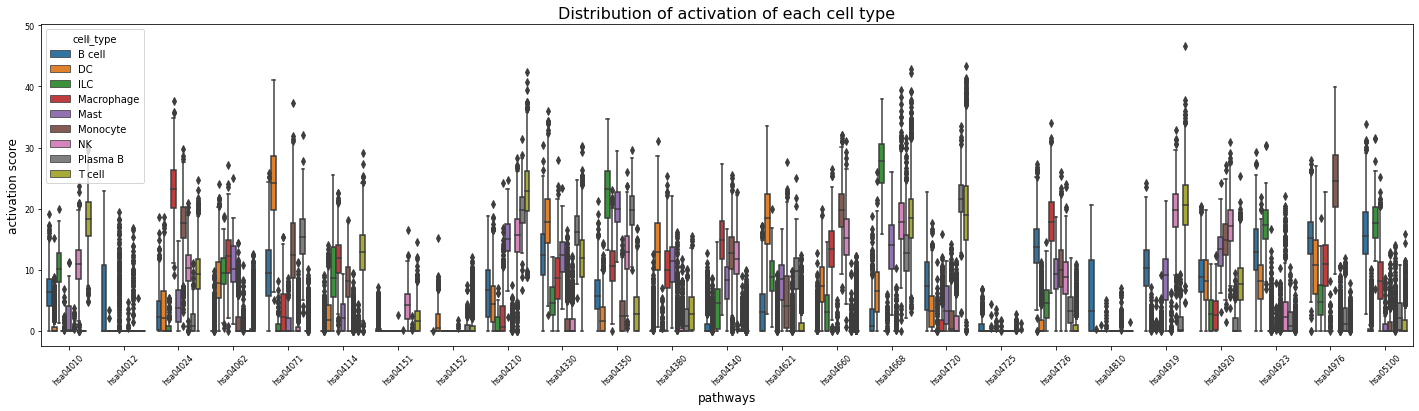

In [27]:
# to visualize the distribution for each pathway, pd.melt operation applied into df_plot dataset
# visualization of the activities of all pathway according to cell_type
order_train = sorted(list(set(df_raw['cell_type'].values)))
plt.figure(figsize=(20,6))
sns.boxplot(x='variable', y='value', data=pd.melt(df_active, id_vars='cell_type'), hue='cell_type', hue_order=dict(zip(order_train, range(len(order_train)))))
plt.xticks(rotation=45);
plt.title('Distribution of activation of each cell type')
plt.xlabel('pathways')
plt.ylabel('activation score')
plt.tight_layout()
# exporting the graph
plt.savefig(os.path.join(loc_output, 'distribution_activities_fig3g.png'), dpi=300, bbox_inches = 'tight')